# NLE Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [1]:
candidateno=244859 #this MUST be updated to your candidate number so that you get a unique data sample


In [2]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [3]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)                       
 

def get_train_test_data():
    
    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')
   
    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]
   
    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [4]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['"', 'the', 'fighting', 'sullivans', '"', 'contains', ...], 'pos')


In [5]:
training_data[5]

(['even', 'if', 'i', 'did', 'not', 'know', 'that', ...], 'pos')

1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

## **1.c.  Explanation on generation of list of 10 content words each from positive and negative reviews**

Here the data is taken from nltk movie_reviews corpus and it has been split into `pos_review_ids` and `neg_review_ids`, this was done by identifying the reviews with 'pos' fileid as `pos_review_ids` and with 'neg' as `neg_review_ids` using `get_train_test_data` function and this data is further divided into `pos_train_ids`, `pos_test_ids` and `neg_train_ids`, `neg_test_ids` datasets using and `split_data` function in the ratio of 70:30. And then the data was labelled as 'pos' and 'neg' and concatenated `pos_train_ids` , `neg_train_ids` as 'training' and `pos_test_ids` and `neg_test_ids` as 'testing'. After these steps, the amount of training data is 1400 data and testing data is 600. Here the random seed is constant(which is given as my candidate number). So that each and every time I run this I will get only the same data instead of random ones.

After this, `training_word_frequency` and `testing_word_frequency` lists were generated by importing FreqDist fromnltk.probability library. This data was analysed and there are a large number of stop words in the data. Stopwords are non-content bearing high frequency words, which hold no information of the text sentiment. Some of the examples of stopwords in English are ‘The’, 'of', 'and', 'on', 'in' etc. So,these stopwords should be removed before training the model. And after that lemmatization is done on the data in order to bring together all the inflected forms of a word so they can be considered and analysed as a single item. For Example in English the verb 'go' may appear as 'goes', 'went', 'gone', 'going' , for all these forms the base form 'go' is the lemma for the word. These newly filtered pre-processed datasets were called `training_prepros` and `testing_prepros`. They have less vocabulary size when compared to earlier datasets. This vocabulary size reduction really helps in building an effective model. This pre-processed training and testing dataset is a list of tuples of freq_dist of doc(word and its frequency) and label.

Now, the positive and negative freq_dist vocabulary is built from the pre-processed training data, which has 'pos' and 'neg' labels, and they are named as `pos_word_freq` and `neg_word_freq`. Then, the top 10 most frequent positive and negative words are filtered out by using `most_frequent_words` function which filtered the top 10 words in each category by sorting the difference from each category with another. These top 10 most common words in each category are turned into a list and named as `my_positive_word_list` and `my_negative_word_list`.

## **1.a and 1.b.  Generation of list of 10 content words each from *Positive* and *Negative* reviews**

In [6]:
pos_review_ids=movie_reviews.fileids('pos')
neg_review_ids=movie_reviews.fileids('neg')

print("The number of positive reviews is {}".format(len(pos_review_ids)))
print("The number of negative reviews is {}".format(len(neg_review_ids)))

The number of positive reviews is 1000
The number of negative reviews is 1000


In [7]:
training_word_frequency =[(FreqDist(doc), label ) for (doc,label) in training_data] #Generating each word and its frequency
testing_word_frequency=[(FreqDist(doc), label ) for (doc,label) in testing_data ]

In [8]:
stop=stopwords.words('english')

In [9]:
from nltk.stem.wordnet import WordNetLemmatizer
Wl = WordNetLemmatizer()
def normalise(wordlist):
    #lowered=[word.lower() for word in wordlist] 
    filtered=[word for word in wordlist if word.isalpha() and word not in stop]
    lemmatizer_sentence=[Wl.lemmatize(word) for word in filtered]
    return lemmatizer_sentence

In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [11]:
training_prepros=[(FreqDist(normalise(wordlist)), pos) for (wordlist,pos) in training_word_frequency]
testing_prepros=[(FreqDist(normalise(wordlist)), pos) for (wordlist,pos) in testing_word_frequency]

In [12]:
type(training_prepros[0]) #training_prepros is a list of tuples of freq_dist of doc(word and its frequency) and label

tuple

In [13]:
pos_word_freq=FreqDist()
neg_word_freq=FreqDist()

for reviewDist,label in training_prepros:
    if label=='pos':
        pos_word_freq+=reviewDist
    else:
        neg_word_freq+=reviewDist
        
pos_word_freq

FreqDist({'fighting': 33,
          'sullivan': 6,
          'contains': 38,
          'major': 92,
          'plot': 280,
          'development': 36,
          'last': 218,
          'ten': 37,
          'minute': 170,
          'every': 233,
          'movie': 780,
          'guide': 10,
          'seen': 256,
          'fit': 49,
          'give': 284,
          'away': 181,
          'dramatic': 69,
          'tension': 51,
          'watching': 125,
          'film': 934,
          'knew': 32,
          'exactly': 102,
          'going': 207,
          'happen': 61,
          'worst': 35,
          'thing': 408,
          'viewing': 49,
          'tread': 6,
          'lightly': 7,
          'ruin': 17,
          'anyone': 108,
          'reading': 33,
          'review': 110,
          'would': 383,
          'advisable': 1,
          'avoid': 28,
          'material': 60,
          'regarding': 12,
          'revolves': 19,
          'around': 228,
          'family': 168,
    

In [14]:
len(pos_word_freq)

22511

In [15]:
len(neg_word_freq)

21104

In [16]:
pos_word_freq['good']

429

In [17]:
neg_word_freq['good']

422

In [18]:
def most_frequent_words(freq1, freq2, k):
    diff=freq1-freq2
    sortedvalues=diff.most_common()
    words=[word for (word,freq) in sortedvalues[:k]]
    return words

In [19]:
my_positive_word_list=most_frequent_words(pos_word_freq,neg_word_freq, 10)
my_negative_word_list=most_frequent_words(neg_word_freq,pos_word_freq, 10)

In [20]:
my_positive_word_list

['performance',
 'life',
 'great',
 'world',
 'take',
 'year',
 'see',
 'also',
 'american',
 'best']

In [21]:
my_negative_word_list

['bad',
 'minute',
 'plot',
 'boring',
 'worst',
 'attempt',
 'stupid',
 'nothing',
 'joke',
 'least']

2) 
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


## **2.b.  Process explained for building a *Word list classifier*** 

By using the positive and negative word lists created, a word list classifier is built.A classifier named SimpleClassifier is built which classified the movie_reviews, depending on the score. The score is incremented if the word in the doc is from positive, and the score is decreased if the word in the doc is from negative. Finally the review was classified as positive if the score is greater than 0 and negative if it is less than 0. Using this SimpleClassifier another classifier named SimpleClassifier_mf is built with most_frequent_words function which is used to classify the reviews. Now the training data is used for training this SimpleClassifier_mf classifier and it was tested on testing data.After testing, the model gave the predicted values for all the testing_prepos data which is used for testing.

## **2.a. Building a *Word list classifier***

In [22]:
  from nltk.classify.api import ClassifierI
import random

class SimpleClassifier(ClassifierI): 

    def __init__(self, pos, neg): 
        self._pos = pos 
        self._neg = neg 

    def classify(self, doc): 
        score = 0
        
        # add code here that assigns an appropriate value to score
        for word, value in doc.items():
            if word in self._pos:
                score+=value
            if word in self._neg:
                score-=value
        return "neg" if score < 0 else "pos"

    ##we don't actually need to define the classify_many method as it is provided in ClassifierI
    #def classify_many(self, docs): 
    #    return [self.classify(doc) for doc in docs] 

    def labels(self): 
        return ("pos", "neg")

#Example usage:

classifier = SimpleClassifier(my_positive_word_list, my_negative_word_list)
classifier.classify(FreqDist("This movie was great".split()))

'pos'

In [23]:
class SimpleClassifier_mf(SimpleClassifier):
    
    def __init__(self,k):
        self._k=k
    
    def train(self,training_data):
        
        pos_word_freq=FreqDist()
        neg_word_freq=FreqDist()

        for reviewDist,label in training_data:
            if label=='pos':
                pos_word_freq+=reviewDist
            else:
                neg_word_freq+=reviewDist
                
        self._pos=most_frequent_words(pos_word_freq,neg_word_freq,self._k)
        self._neg=most_frequent_words(neg_word_freq,pos_word_freq,self._k)
    

In [24]:
movieclassifier_most_frequent_words=SimpleClassifier_mf(10)

In [25]:
movieclassifier_most_frequent_words.train(training_prepros)

In [26]:
movieclassifier_most_frequent_words.classify(FreqDist("I love this movie".split()))

'pos'

In [27]:
testing,labels=zip(*testing_prepros)
movieclassifier_most_frequent_words.classify_many(testing)

['pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',


3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

## **3.a. Calculating the accuracy, precision, recall and F1 score of *Word list classifier***

In [28]:
def classifier_evaluate(cls, test_data):
    '''
    cls: an instance of a classifier object which has a classify method which returns "pos" or "neg"
    test_data: a list of pairs where each pair is a FreqDist rep of a doc and its label
  
    returns: float point number which is the accuracy of the classifier on the test data provided 
    '''
    acc = 0
    docs,goldstandard=zip(*test_data) #note this neat pythonic way of turning a list of pairs into a pair of lists
    #pass all of the docs to the classifier and get back a list of predictions
    predictions=cls.classify_many(docs)
    #zip the predictions with the goldstandard labels and compare
    for prediction,goldlabel in zip(predictions,goldstandard):
        if prediction==goldlabel:
            acc+=1
    
    return acc / (len(test_data))

In [29]:
score = classifier_evaluate(movieclassifier_most_frequent_words, testing_prepros)  
print(score*100)

61.33333333333333


In [30]:
class ConfusionMatrix:
    def __init__(self,predictions,goldstandard,classes=("pos","neg")):
    
        (self.c1,self.c2)=classes
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0
        
        for p,g in zip(predictions,goldstandard):
            if g==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1
        
            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1
        
    
    def precision(self):
        p=0
        #put your code to compute precision here
        p=(self.TP/(self.TP+self.FP))
        return p
  
    def recall(self):
        r=0
        #put your code to compute recall here
        r=(self.TP/(self.TP+self.FN))
        return r
  
    def f1(self):
        f1=0
        #put your code to compute f1 here
        f1=((2*self.precision()*self.recall())/(self.precision()+self.recall()))
        return f1 

In [31]:
docs,labels=zip(*testing_prepros)
senti_cm=ConfusionMatrix(movieclassifier_most_frequent_words.classify_many(docs),labels)
print("TP's are",senti_cm.TP)
print("FP's are",senti_cm.FP)
print("TN's are",senti_cm.TN)
print("FN's are",senti_cm.FN)
print("The Precision is", senti_cm.precision())
print("The Recall is ",senti_cm.recall())
print("The f1 score is",senti_cm.f1())

TP's are 287
FP's are 219
TN's are 81
FN's are 13
The Precision is 0.567193675889328
The Recall is  0.9566666666666667
The f1 score is 0.7121588089330024


## **3.b. Discussion on whether it is reasonable/not reasonable to evaluate the classifier in terms of its accuracy**
The accuracy of the classifier is calculated with a word list of size 10. The accuracy came around 61.33%. Accuracy is the  proportion of correct predictions to the total number of cases examined(total predictions).

 

Accuracy alone is not reasonable  to evaluate the performance of the classifier in all scenarios. Accuracy treats all the scenarios the same and given as percentage of correct responses. Accuracy may be fine when you’re dealing with balanced or approximately balanced datasets. The further you get far away from 50/50, the more it is misleading. But in the real world, not every dataset is a balanced one.

 

To explain it further, let’s take an example of Fraud detection in the finance sector which is a high risk factor. Here the aim is to predict which transaction is a fraud. In real word most of the transactions are genuine/non-fraudulent transactions. If spoken in terms of percentages only 1% of the entire transactions are fraudulent. Predicting these 1% accurately is very important. Here the dataset is with a 99:1 ratio of genuine to fraudulent transactions. Simply predicting the majority class gives a 99% accurate classifier! But in this case we are more bothered about predicting 1% fraudulent  rather than 99% genuine transactions. In the above scenario, the classifier predicts all the cases as genuine transactions giving an accuracy of 99% neglecting the fraudulent ones. This model has great accuracy but is useless in predicting the required fraudulent cases. In this case accuracy is totally misleading.

4) 
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results. 

[12.5\%]

## **4.a. Construction of  *Naive Bayes classifier***

In [32]:
from nltk.metrics.scores import (precision, recall)

In [33]:
classifier = nltk.NaiveBayesClassifier.train(training_prepros)

In [34]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_prepros))*100)

Classifier accuracy percent: 67.0


In [35]:
docs,labels=zip(*testing_prepros)
naive_bayes_metrics=ConfusionMatrix(classifier.classify_many(docs),labels)

In [36]:
print("TP's are",naive_bayes_metrics.TP)
print("FP's are",naive_bayes_metrics.FP)
print("TN's are",naive_bayes_metrics.TN)
print("FN's are",naive_bayes_metrics.FN)
print("The Precision is", naive_bayes_metrics.precision())
print("The Recall is ",naive_bayes_metrics.recall())
print("The f1 score is",naive_bayes_metrics.f1())

TP's are 291
FP's are 189
TN's are 111
FN's are 9
The Precision is 0.60625
The Recall is  0.97
The f1 score is 0.7461538461538461


In [37]:
classifier.show_most_informative_features(20)

Most Informative Features
               ludicrous = 1                 neg : pos    =     21.0 : 1.0
               affecting = 1                 pos : neg    =     11.7 : 1.0
                   anger = 1                 pos : neg    =     11.4 : 1.0
              astounding = 1                 pos : neg    =     11.0 : 1.0
            breathtaking = 1                 pos : neg    =     10.6 : 1.0
               insulting = 1                 neg : pos    =     10.3 : 1.0
                    jedi = 1                 pos : neg    =     10.3 : 1.0
             outstanding = 1                 pos : neg    =      9.7 : 1.0
                seamless = 1                 pos : neg    =      9.0 : 1.0
                  minnie = 1                 pos : neg    =      9.0 : 1.0
           unintentional = 1                 neg : pos    =      9.0 : 1.0
              mechanical = 1                 neg : pos    =      9.0 : 1.0
                  darker = 1                 pos : neg    =      9.0 : 1.0

## **4.b. Performance comparision between word list classifier and Naive Bayes classifier** 
After running the models(word list classifier and Naive Bayes classifier), the performance of the Naive Bayes classifier found out to be better than word list classifier(wordlist size of 10) in terms of all metrics like accuracy, precision, recall and f1 score. The various metrics considered in the evaluation of the performance of the classifiers are discussed below. 

1.  When a positive example classified as positive, it is called a **true positive(TP)**.
2.  When a positive example misclassified as negative, it is called a **false negative(FN)**.
3.  When a negative example classified as negative, it is called a **true negative(TN)**.
4.  When a negative example misclassified as positive, it is called a **false positive(FP)**.
5.  **Accuracy** is the number of correct predictions to the total number of predictions.

\begin{eqnarray*}
Accuracy=\frac{TP+TN}{TP+FP+TN+FN}
\end{eqnarray*}

6.  **Precision(P)** is the ability to identify relevant instances among the total retrieved instances.

 
\begin{eqnarray*}
P=\frac{TP}{TP+FP}
\end{eqnarray*}

7.  **Recall(R)** says what proportion of actual positives/negatives were identified correctly.

\begin{eqnarray*}
R=\frac{TP}{TP+FN}
\end{eqnarray*}

8.  **F1 Score** is a way of joining the precision and recall of the model, and it is defined as the harmonic mean of the model's precision and recall. 

\begin{eqnarray*}
F1 = \frac{2\times P\times R}{P+R}
\end{eqnarray*}


Word list classifier, True Positives(TP)  are **287**,False Positives(FP) are **219**, True Negatives(TN)  are **81**, False Negatives(FN) are **13**,Precision is **0.567193675889328**, Recall is **0.9566666666666667**, f1 score is **0.7121588089330024**, accuracy is **61.33333333333333%** 

Naive Bayes classifier True Positives(TP)  are **291**,False Positives(FP) are **189**, True Negatives(TN)  are **111**, False Negatives(FN) are **9**,Precision is **0.60625**, Recall is  **0.97**,f1 score is **0.7461538461538461**, accuracy is **67.0%**. 

5) 
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions. 

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


## **5.a. An experiment into the impact of the length of the wordlists on the wordlist classifier**
The  impact of the length of the wordlists on the wordlist classifier is found out by designing an experiment where the size of the wordlist is varied every time and the model is trained using updated wordlist and the impact is calculated using the accuracy metric. Here, the accuracy is selected as a performance evaluation metric because the movie reviews set used here is a balanced dataset. It has a total of 1000 positive reviews and 1000 negative reviews.

In [38]:
from random import sample

wordlist_size=[10,20,30,40,50,60,70,80,90,100]
results={}
for x in wordlist_size:
    Word_List_MF=SimpleClassifier_mf(x)
    Word_List_MF.train(training_prepros)
    #docs,labels=zip(*testing_prepros)
    accuracy=classifier_evaluate(Word_List_MF, testing_prepros) 
    print("The accuracy of SimpleClassifier_mf classifier with wordlist size {} is {}".format(x, accuracy*100))
    results[x]=accuracy*100

results           

The accuracy of SimpleClassifier_mf classifier with wordlist size 10 is 61.33333333333333
The accuracy of SimpleClassifier_mf classifier with wordlist size 20 is 56.49999999999999
The accuracy of SimpleClassifier_mf classifier with wordlist size 30 is 66.5
The accuracy of SimpleClassifier_mf classifier with wordlist size 40 is 65.33333333333333
The accuracy of SimpleClassifier_mf classifier with wordlist size 50 is 66.0
The accuracy of SimpleClassifier_mf classifier with wordlist size 60 is 64.33333333333333
The accuracy of SimpleClassifier_mf classifier with wordlist size 70 is 69.5
The accuracy of SimpleClassifier_mf classifier with wordlist size 80 is 68.83333333333333
The accuracy of SimpleClassifier_mf classifier with wordlist size 90 is 71.16666666666667
The accuracy of SimpleClassifier_mf classifier with wordlist size 100 is 72.0


{10: 61.33333333333333,
 20: 56.49999999999999,
 30: 66.5,
 40: 65.33333333333333,
 50: 66.0,
 60: 64.33333333333333,
 70: 69.5,
 80: 68.83333333333333,
 90: 71.16666666666667,
 100: 72.0}

In [39]:
from matplotlib import pyplot as plt
import pandas as pd
df=pd.DataFrame(results, index=[0])
df=df.transpose()

df.columns = ['Accuracy']
df

,Accuracy
10,61.333333
20,56.500000
30,66.500000
40,65.333333
50,66.000000
60,64.333333
70,69.500000
80,68.833333
90,71.166667
100,72.000000


Text(0.5, 0, 'Word list size')

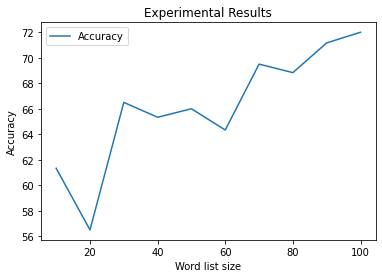

In [40]:
ax = df.plot(kind="line",title="Experimental Results")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Word list size")

## **5.b. My Recommendation**

From the experiment, it was evident that the word list classifier with the word list size 70 and above 70 has performed better than naïve bayes. The accuracy of Naïve bayes was 67.0%, while the accuracy of word list classifier (wordlist size >=70) seemed to be increased and was around 72% for wordlist of size 100. 

Taking all these into consideration, I would recommend a wordlist classifier for future work in this area when compared to Naïve Bayes.In real word problems, I believe that the word list size would be huge, and hence a word list classifier would perform better in those scenarios.

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437

import io
from nbformat import current

#filepath="/content/drive/My Drive/NLE Notebooks/assessment/assignment1.ipynb"
filepath="/content/drive/My Drive/Colab Notebooks/AppNLP_Notebooks/Assignments/PG2021/NLassignment2021.ipynb"
question_count=437

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

/usr/local/lib/python3.7/dist-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


Submission length is 1216
